# **DỰ ĐOÁN GIÁ XE HƠI - HỒI QUY TUYẾN TÍNH**


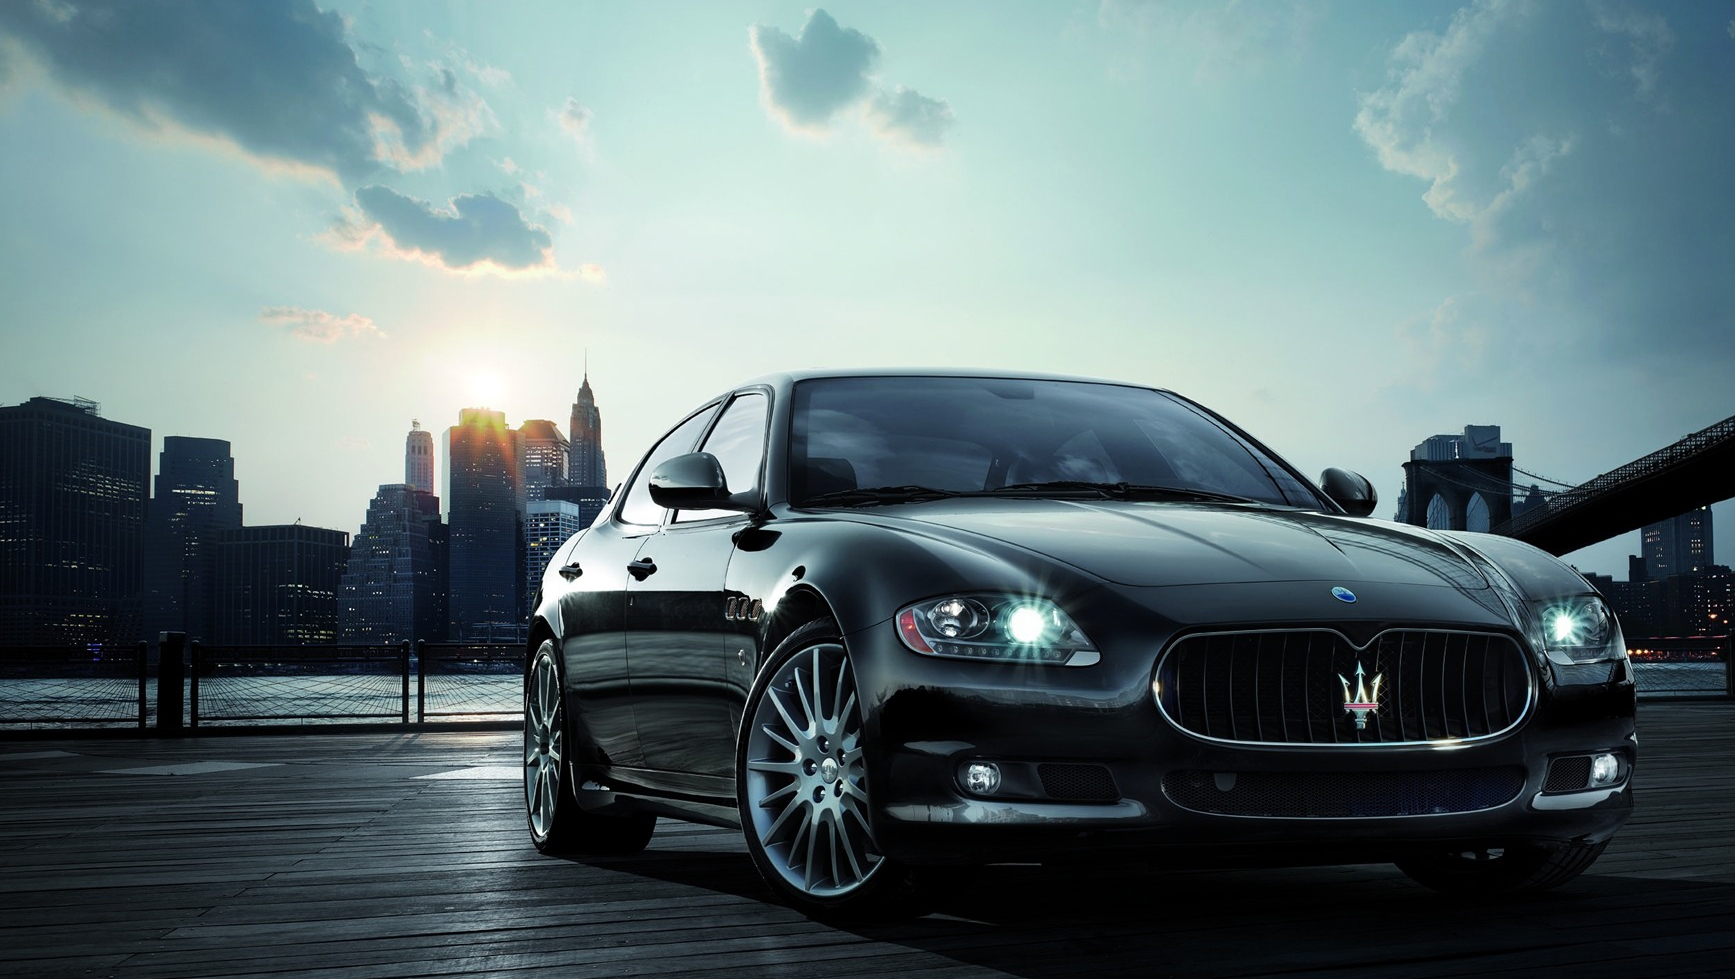

## Đặt vấn đề
Công ty ô tô tại Trung Quốc có tham vọng muốn thâm nhập vào thị trường Mỹ bằng cách thành lập đơn vị sản xuất của họ ở đó. Thứ hai là sản xuất ô tô trong nước để cạnh tranh với các đối tác Mỹ và Châu Âu.
 Họ muốn hiểu các yếu tố ảnh hưởng đến việc định giá ô tô tại thị trường Mỹ, vì những yếu tố này có thể khác biệt đáng kể so với ở Trung Quốc. Về cơ bản, công ty muốn biết:

- Những biến nào có ý nghĩa trong việc dự đoán giá của một chiếc xe hơi?
- Các biến đó mô tả giá xe tốt như thế nào?


## Mục tiêu hướng đến
Lập mô hình giá ô tô với các thuộc tính. Điều này giúp chúng ta hiểu chính xác giá thay đổi như thế nào với các biến độc lập.Theo đó, họ có thể thao túng thiết kế của những chiếc xe, chiến lược kinh doanh, v.v. để đáp ứng các mức giá nhất định.

## Cách tiếp cận
Quá trình nghiên cứu thực hiện dự án gồm 5 bước cơ bản:
  - Bước 1: Thu nhập và tìm hiểu tổng quan về bộ dữ liệu
  - Bước 2: Xử lí và làm sạch dữ liệu nghiên cứu
  - Bước 3: Phân tích khám phá dữ liệu
  - Bước 4: Xây dựng mô hình hồi quy tuyến tính
  - Bước 5: Đánh giá và dự đoán giá.


In [168]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bước 1: Thu nhập và tìm hiểu tổng quan về bộ dữ liệu

1. Đọc dữ liệu bằng cách sử dụng thư viện pandas
2. Tìm hiều về cấu trúc của dữ liệu cần phân tích

In [169]:
# Dữ liệu sử dụng được lấy từ kaggle
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Giải thích một số thuộc tính:
- symboling - Mức độ rủi ro so với giá xe của nó: -3, -2, -1, 0, 1, 2, 3.
- fueltype - Loại nhiên liệu: diesel, gas.
- aspiration - Động cơ hút khí : std, turbo.
- carbody - Kiểu dáng xe: hardtop, wagon, sedan, hatchback, convertible.
- drivewheel - Hệ dẫn động: 4wd, fwd, rwd.
- cylindernumber - Số xi-lanh: eight, five, four, six, three, twelve, two.
- horsepower - Mã lực
- peakrpm - Vòng tua máy cao nhất là số vòng quay của trục khuỷu trong vòng 1 phút
- citympg - Lượng nhiên liệu tiêu thụ khi đi trong thành phố
- highwaympg - Lượng nhiên liệu tiêu thụ khi đi trên xa lộ
- price - Giá

In [170]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [171]:
#Ta có 205 dòng và 26 cột
cars.shape

(205, 26)

In [172]:
#Tìm hiểu tổng quát các cột của dữ liệu
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Nhận xét: Không có giá trị nào bị thiếu**

**PHÂN LOẠI DỮ LIỆU**

***Categorical***
- symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem 

***Numerical***
- wheelbase, length, width, height, curbweight, enginesize, bore, stroke, compressionration, horsepower, peakrpm, citympg, highwaympg, price

In [173]:
#Thay đổi kiểu dữ liệu 
features = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem", "symboling"]
def convert_cat(cars, features):
    for feature in features:
        cars[feature] = cars[feature].astype("category") 
convert_cat(cars, features)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

**Tìm hiểu về phân bổ giá trị của các cột dữ liệu**

In [174]:
#Numerical
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Nhận xét
- wheelbase: từ 86.6 - 120.9.
- length: từ 141.1 - 208.1.
- width: từ 60.3 - 72.3.
- height: từ 47.8 - 59.8.
- curbweight: từ 1488 - 4066.
- enginesize: từ 61 - 326.
- bore: từ 2.54 - 3.94.
- stroke: từ 2.07 - 4.17.
- compressionratio: từ 7 - 23.
- horsepower: từ 48 - 288.
- peakrpm: từ 4150 - 6600.
- citympg: từ 13 - 49.
- highwaympg: từ 16 - 54.
- price: từ 5118 - 45400.

In [175]:
#Categorical
cars.describe(include=['category'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,185,168,115,96,120,202,148,159,94


In [176]:
cars['symboling'].unique

<bound method Series.unique of 0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: category
Categories (6, int64): [-2, -1, 0, 1, 2, 3]>

Nhận xét : Ta thấy được không có chiếc xe nào có mức độ rủi ro so với gia xe là tuyệt đối an toàn vì giá trị nhỏ nhất của symboling bằng -2 trong khi thực tế có mức an toàn nhất là -3.

## Bước 2 : Xử lí và làm sạch dữ liệu

In [177]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Nhìn vào dữ liệu, ta thấy điểu không hợp lí ở cột index và car_ID, giá trị hai cột khá khớp nhau. Thêm vào đó, ta thấy được các giá trị trong cột car_ID chỉ  đánh số thứ tự từng chiếc xe mà thôi, nó không là đặc trưng hữu ích mà ta cần quan tâm. Vì thế, ta cần chuyển đổi cột car_ID thành index

In [178]:
cars.set_index(cars.car_ID, inplace=True)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Sau khi chuyển đổi, ta thấy cột car_ID vẫn còn. Ta dùng hàm drop() để xóa bỏ cột này

In [179]:
cars.drop(['car_ID'],axis=1,inplace=True)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Nhìn vào dữ liệu cột CarName, đọc bất kỳ một dòng trong cột ta sẽ biết được tên công ty xe và dòng xe của nó. Với mục tiêu hướng tới là phân tích giá của từng công ty xe vì thế mà ta cần tách tên công ty ra từ cột CarName để ta có thể phân loại công ty thay vì để theo tên xe như ban đầu

In [180]:
#Tách tên công ty từ cột CarName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
# Xóa cột CarName
cars.drop(['CarName'],axis=1,inplace=True)

In [181]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Một số tên công ty giống nhau nhưng bị lỗi chính tả hoặc sử dụng tên thủ đô nên chúng xuất hiện dưới hai dạng. Vì thế, ta cần chỉnh sửa những lỗi đó:
- `alfa-romeo` -> `alfa-romero`
- `maxda` -> `mazda`
- `Nissan` -> `nissan`
- `porcshce`-> `porsche`
- `toyouta` -> `toyota`
-  `vw` -> `vokswagen` -> `volkswagen`

In [182]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Bước 3: Phân tích khám phá dữ liệu


### Khảo sát chung về phân phối giá xe và sự chênh lệch giữa các giá xe

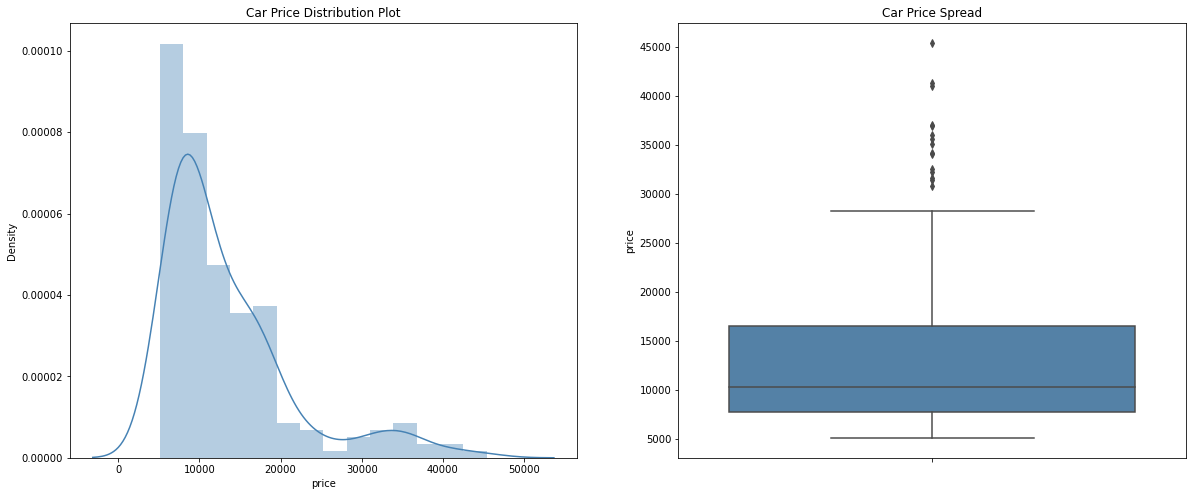

In [183]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price, color = "Steelblue")

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price, color = "Steelblue")

plt.show()

In [184]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Observation 
- Fig 1:
    - Biểu đồ bị lệch hẳn sang phải (giá trị trung vị < giá trị trung bình) và dữ liệu đa phần nằm trong khoảng từ 5000 - 15000, điều này có nghĩa là hầu hết các mức giá trong tập dữ liệu đều thấp (Dưới 15.000). 
    - Bên cạnh đó, vẫn có những giá xe nằm trong khoảng từ 30000 - 45000
- Fig 2:
    - Có sự khác biệt đáng kể giữa giá trị trung bình và giá trị trung vị của phân phối giá.
    - Có các giá trị ngoại lai rơi vào khoảng từ 30000 - 45000 
- Các điểm dữ liệu chênh lệch xa so với mức trung bình, điều này cho thấy giá xe có sự chênh lệch cao (85% giá dưới 18.500, trong khi 15% còn lại nằm trong khoảng 18.500 đến 45.400).

#### Bước 3.1 : Trực quan hóa đối với dữ liệu ở dạng phân loại
    - CompanyName (tên hãng xe)
    - Symboling (mức độ rủi ro bảo hiểm so với giá xe)
    - fueltype (loại nhiên liệu)
    - enginetype (loại năng lượng)
    - carbody (kiểu dáng xe)
    - doornumber (số cửa)
    - enginelocation (vị trí động cơ)
    - fuelsystem (hệ thông nhiên liệu)
    - cylindernumber (số xi-lanh)
    - aspiration (động cơ hút khí)
    - drivewheel (hệ dẫn động)

#### Company Name

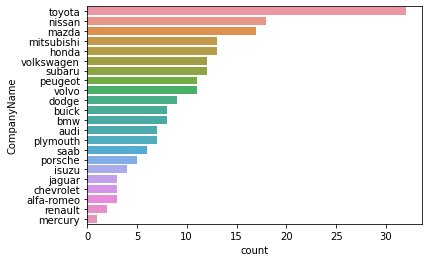

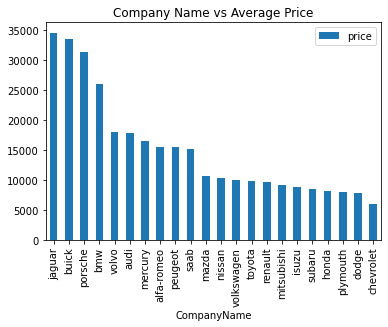

In [185]:
sns.countplot(data = cars, y = "CompanyName",
              order = cars['CompanyName'].value_counts(ascending = False).index)


df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

##### Observation 
- Fig 1 + 2:
    - Các dòng xe của `Toyota` trên thị trường chiếm số lượng lớn (hơn 30 dòng) và gấp gần 1/2 dòng xe của hãng xe đứng thứ hai là `Nissan`.
    - Các dòng xe của các hãng xe có giá thành cao như `Jaguar` và `Buick` thì lần lượt chiếm các vị trí 18 và 11.

#### Fueltype

(array([0, 1]), [Text(0, 0, 'diesel'), Text(1, 0, 'gas')])

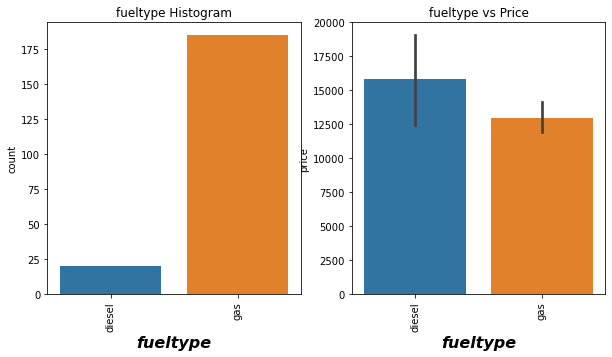

In [112]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('fueltype', size=16, fontstyle='italic', weight=900)
plt.title('fueltype Histogram')
sns.countplot(cars.fueltype)
plt.xticks(rotation= 90)
    
plt.subplot(1,2,2)
plt.xlabel('fueltype', size=16, fontstyle='italic', weight=900)
plt.title('fueltype vs Price')
sns.barplot(x=cars.fueltype, y=cars.price)
plt.xticks(rotation= 90)

##### Observation
 - Fig 1.1: 
    - Số lượng ô tô chạy bằng nhiên liệu `gas` (gasline) nhiều hơn lượng ô tô chạy bằng nhiên liệu dầu `disel`.
 - Fig 1.2: 
    - Dầu `diesel` có giá thành trung bình cao hơn `gas` (gasline).


#### Carbody & Doornumber

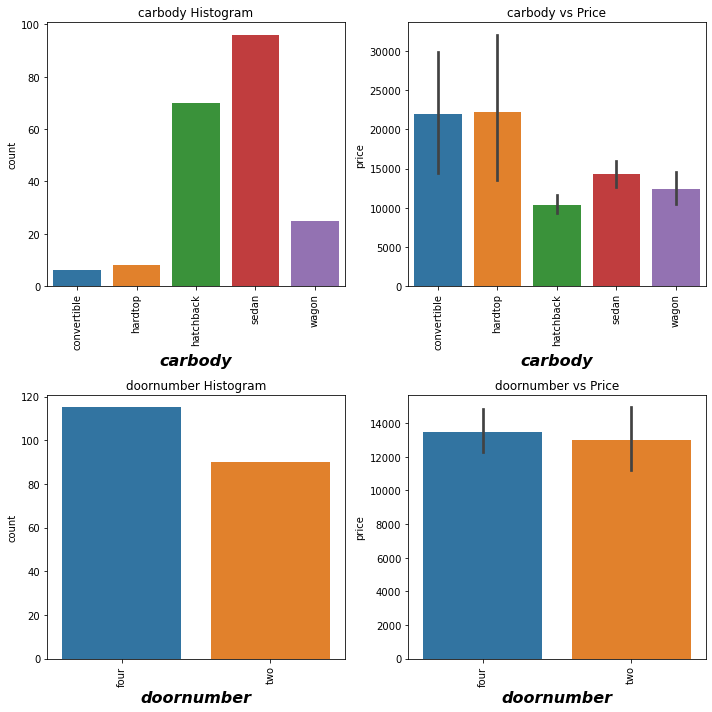

In [113]:
def plot_count(x,fig):
    plt.subplot(2,2,fig)
    plt.xlabel(x, size=16, fontstyle='italic', weight=900)
    plt.title(x+' Histogram')
    sns.countplot(cars[x])
    plt.xticks(rotation= 90)
    
    plt.subplot(2,2,(fig+1))
    plt.xlabel(x, size=16, fontstyle='italic', weight=900)
    plt.title(x+' vs Price')
    sns.barplot(x=cars[x], y=cars.price)
    plt.xticks(rotation= 90)
    
    
plt.figure(figsize=(10,10))

plot_count('carbody', 1)
plot_count('doornumber', 3)

plt.tight_layout()

##### Observation
- Fig 1:
    - 1.1: `Sedan` và `Hatchback` là hai kiểu dáng xe được ưa chuộng nhất.
    - 1.2: `Convertible` và `Hardtop` có giá thành cao nhất.
- Fig 2:
    - Biến số `doornumber` không ảnh hưởng nhiều đến giá. Không có sự khác biệt đáng kể giữa loại có 2 cửa và loại có 4 cửa. Nhưng nhìn chung thì loại có 4 cửa vẫn nhỉnh hơn loại 2 của về số lượng và cả giá thành.



#### Symboling


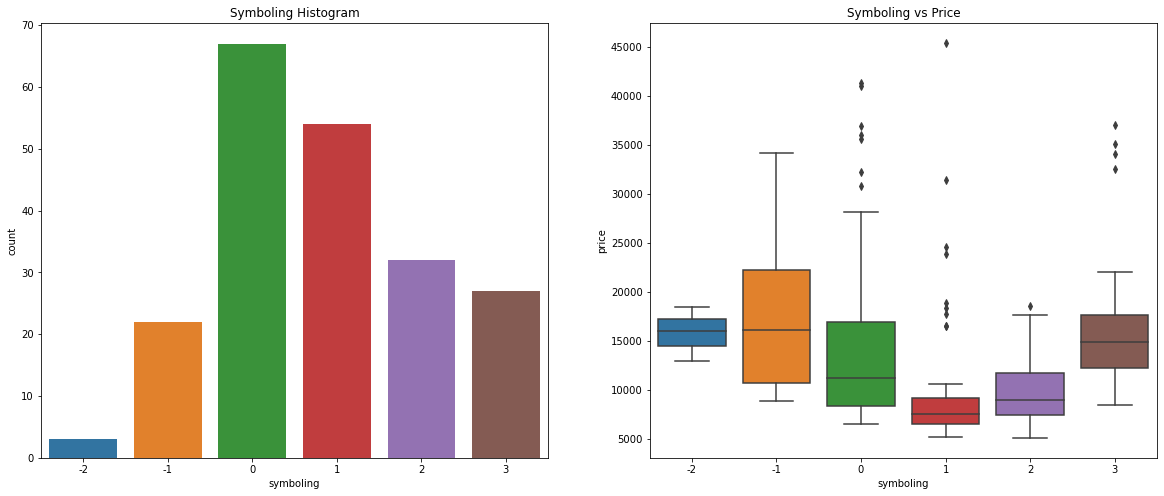

In [114]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)

plt.show()

##### Observation
- Fig1:
Các xe có mức độ rủi ro so với giá xe bằng `0` chiếm số lượng lớn nhất (được bán ra nhiều nhất) và các xe có mức độ rủi ro so với giá xe bằng `1` chiếm số lượng lớn thứ hai.
- Fig2:
Những chiếc xe có mức độ rủi ro so với giá xe bằng `-1` thì có giá thành cao (mức độ rủi ro so với giá xe của các xe này là `-`1 (thấp) được coi như là ở mức an toàn, khá tốt), nhưng các xe có mức độ rủi ro so với giá xe cao như là `3` cũng có giá trị khá cao và nó tương đương với giá với những xe có mức độ rủi ro so với giá xe là `-2`. Giá xe của những xe có mức độ rủi ro so với giá xe là `1` là thấp nhất.

#### Engine type, Engine location, Aspiration, Drivewheel, Cylinder number & Fuel system

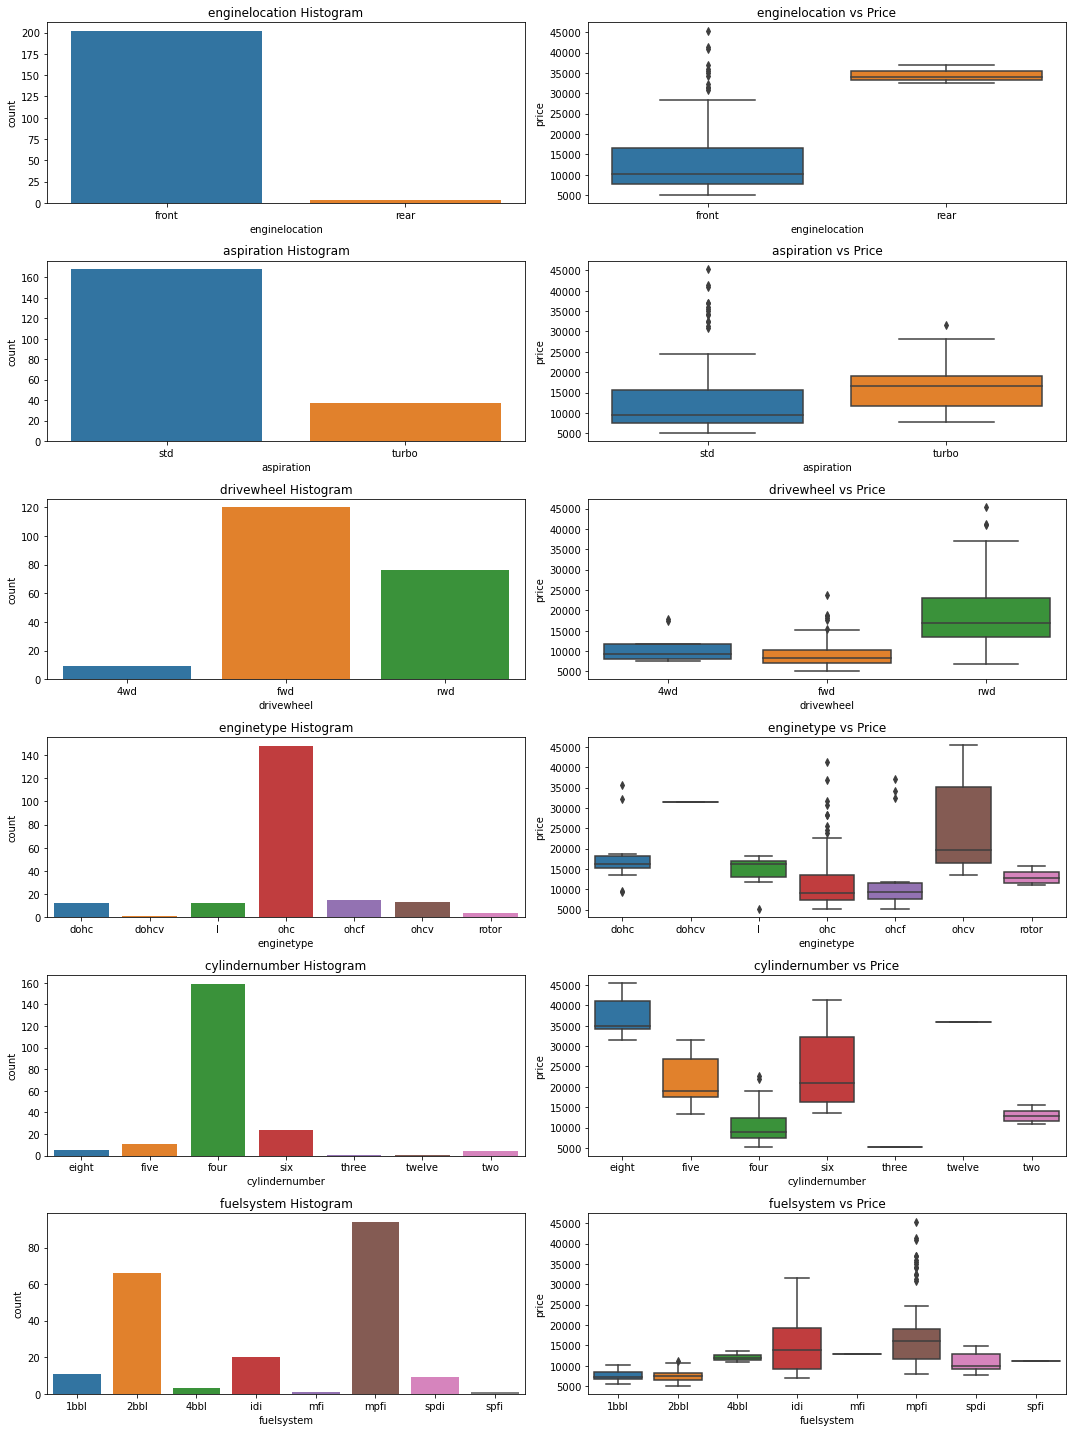

In [115]:
def plot_count(x,fig):
    plt.subplot(6,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x])
    plt.subplot(6,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price)
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('aspiration', 3)
plot_count('drivewheel', 5)
plot_count('enginetype', 7)
plot_count('cylindernumber', 9)
plot_count('fuelsystem', 11)

plt.tight_layout()

##### Observation
- Fig 1:
    - 1.1: Động cơ `ohc` là loại được ưa chuộng nhất (cao hơn rất nhiều so với các loại động cơ còn lại)
    - 1.2: Động cơ `ohcv` có mức giá cao nhất (Trong khi động cơ `dohcv` chỉ có một hàng ngang), các động cơ `ohc` và `ohcf` có mức giá thấp.
- Fig 2:
    - 2.1: Vị trí động cơ ở phía trước chiếm phần lớn so với đặt ở phía sau
    - 2.2: Về giá thành, nhìn chung giá thành của việc đặt vị trí động cơ ở phía trước thấp nhưng tồn tại nhiều giá thành (là các giá trị ngoại lai) rất cao, giá thành của việt đặt vị trí động cơ ở phía sau cao.
- Fig 3:
    - 3.1: Động cơ hút khí `std` chiếm số lượng lớn hơn rất nhiều so với `turbo`
    - 3.2: Động cơ hút khí `turbo` có mức giá cao hơn so với `std` (nhưng `std` có một số mức giá (giá trị ngoại lai) rất cao)
- Fig 4:
    - 4.1 + 4.2: `fwd` là hệ dẫn động được sử dụng nhiều nhất, giá thành của nó cũng là rẻ nhất (vẫn tồn tại một số giá trị ngoại lai). Một sự khác biệt rất đáng kể trong hệ dẫn động. Hầu hết các xe ô tô có tầm xa đều thích hệ dẫn động `rwd` hơn mặc dù giá thành của nó là cao nhất.
- Fig 5:
    - 5.1 + 5.2: Số lượng xi lanh phổ biến nhất là `four`,` six` và `five`. Xi lanh `eight` có mức giá cao nhất.
- Fig 6:
    - 6.1: `mpfi` và `2bbl` là loại hệ thống nhiên liệu phổ biến nhất.
    - 6.2: `mpfi` và `idi` có mức giá cao nhất.

#### Bước 3.2 : Visualising numerical data

#### carlength, carwidth, carheight, curbweight

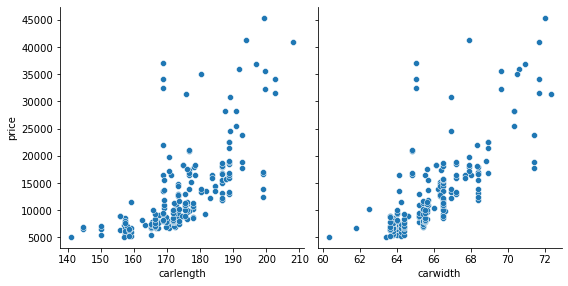

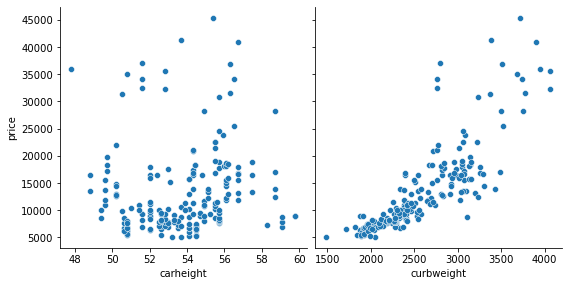

In [116]:
def scatter(x, y):
    sns.pairplot(cars, x_vars=[x,y], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

scatter('carlength', 'carwidth')
scatter('carheight','curbweight')

##### Observation
- Fig 1 + 2:
    - `carwidth`, `carlength` và `curbweigth` có vẻ như có mối tương quan dương với `price`.
    - `carheight` không cho thấy có mối tương quan nào với `price`.

#### enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, wheelbase, citympg & highwaympg

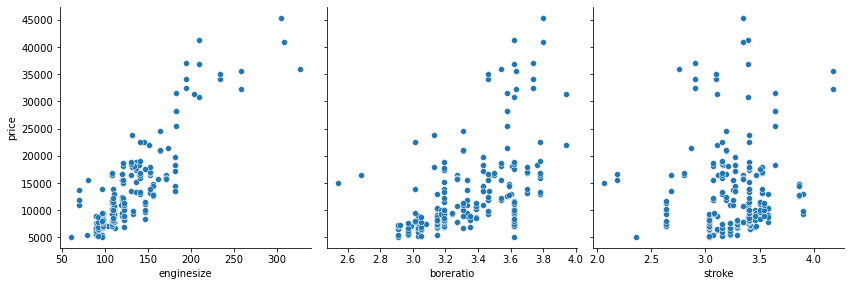

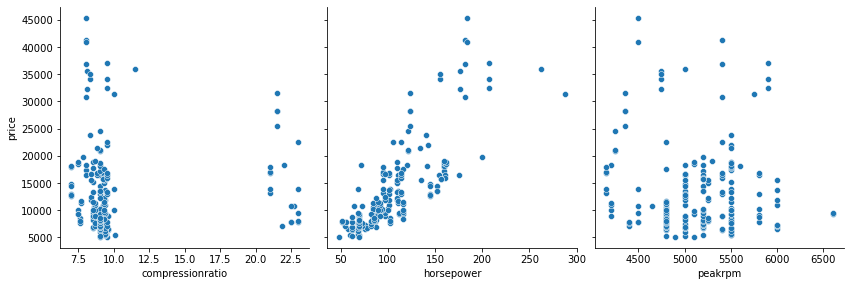

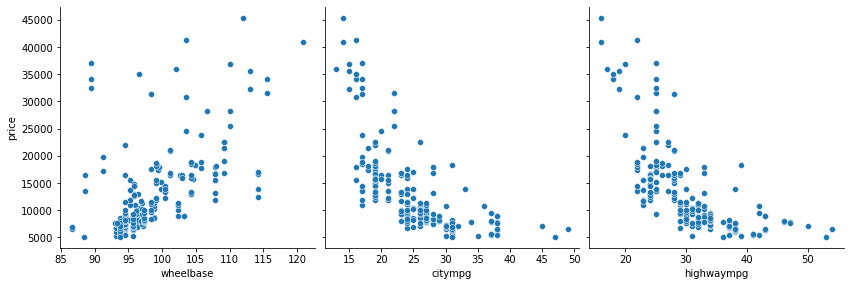

In [117]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

##### Observation
- Fig 1 + 2:
    - `enginesize` ,`enginesize`, `horsepower`, `wheelbase` có vẻ như có mối tương quan dương với `price`.
    - `citympg`, `highwaympg` có vẻ như có mối tương quan âm với `price`.


In [118]:
##### Ví dụ minh chứng về sự tương quan giữa hai biến carlength và carwidth
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.8411182684818453

### Bước 4 : Đặc trưng phát sinh


In [186]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [187]:
# Phân khúc công ty xe dựa trên giá xe trung bình của mỗi công ty.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend'] # Vừa túi tiền, Tầm trung, Cao cấp
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romeo,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
2,3,gas,alfa-romeo,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
3,1,gas,alfa-romeo,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Bước 5 : Phân tích song biến


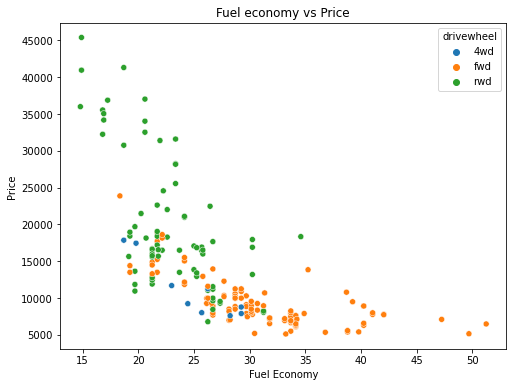

<Figure size 432x288 with 0 Axes>

In [121]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` có mối tương quan âm với `price` và có vai trò quan trọng.

<Figure size 1800x432 with 0 Axes>

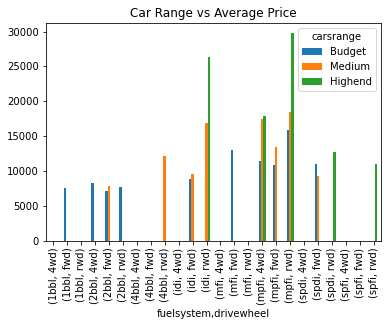

In [122]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :
1. Nhưng xe có phân khúc là cao cấp thì thường sử dụng hệ dẫn động `rwd` với hệ thống nhiên liệu là `idi` hoặc `mpfi`

### Danh sách các biến quan trọng sau khi phân tích trực quan :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [188]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
car_ID,,,,,,,,,,,,,,,,
1,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
3,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
4,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
5,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


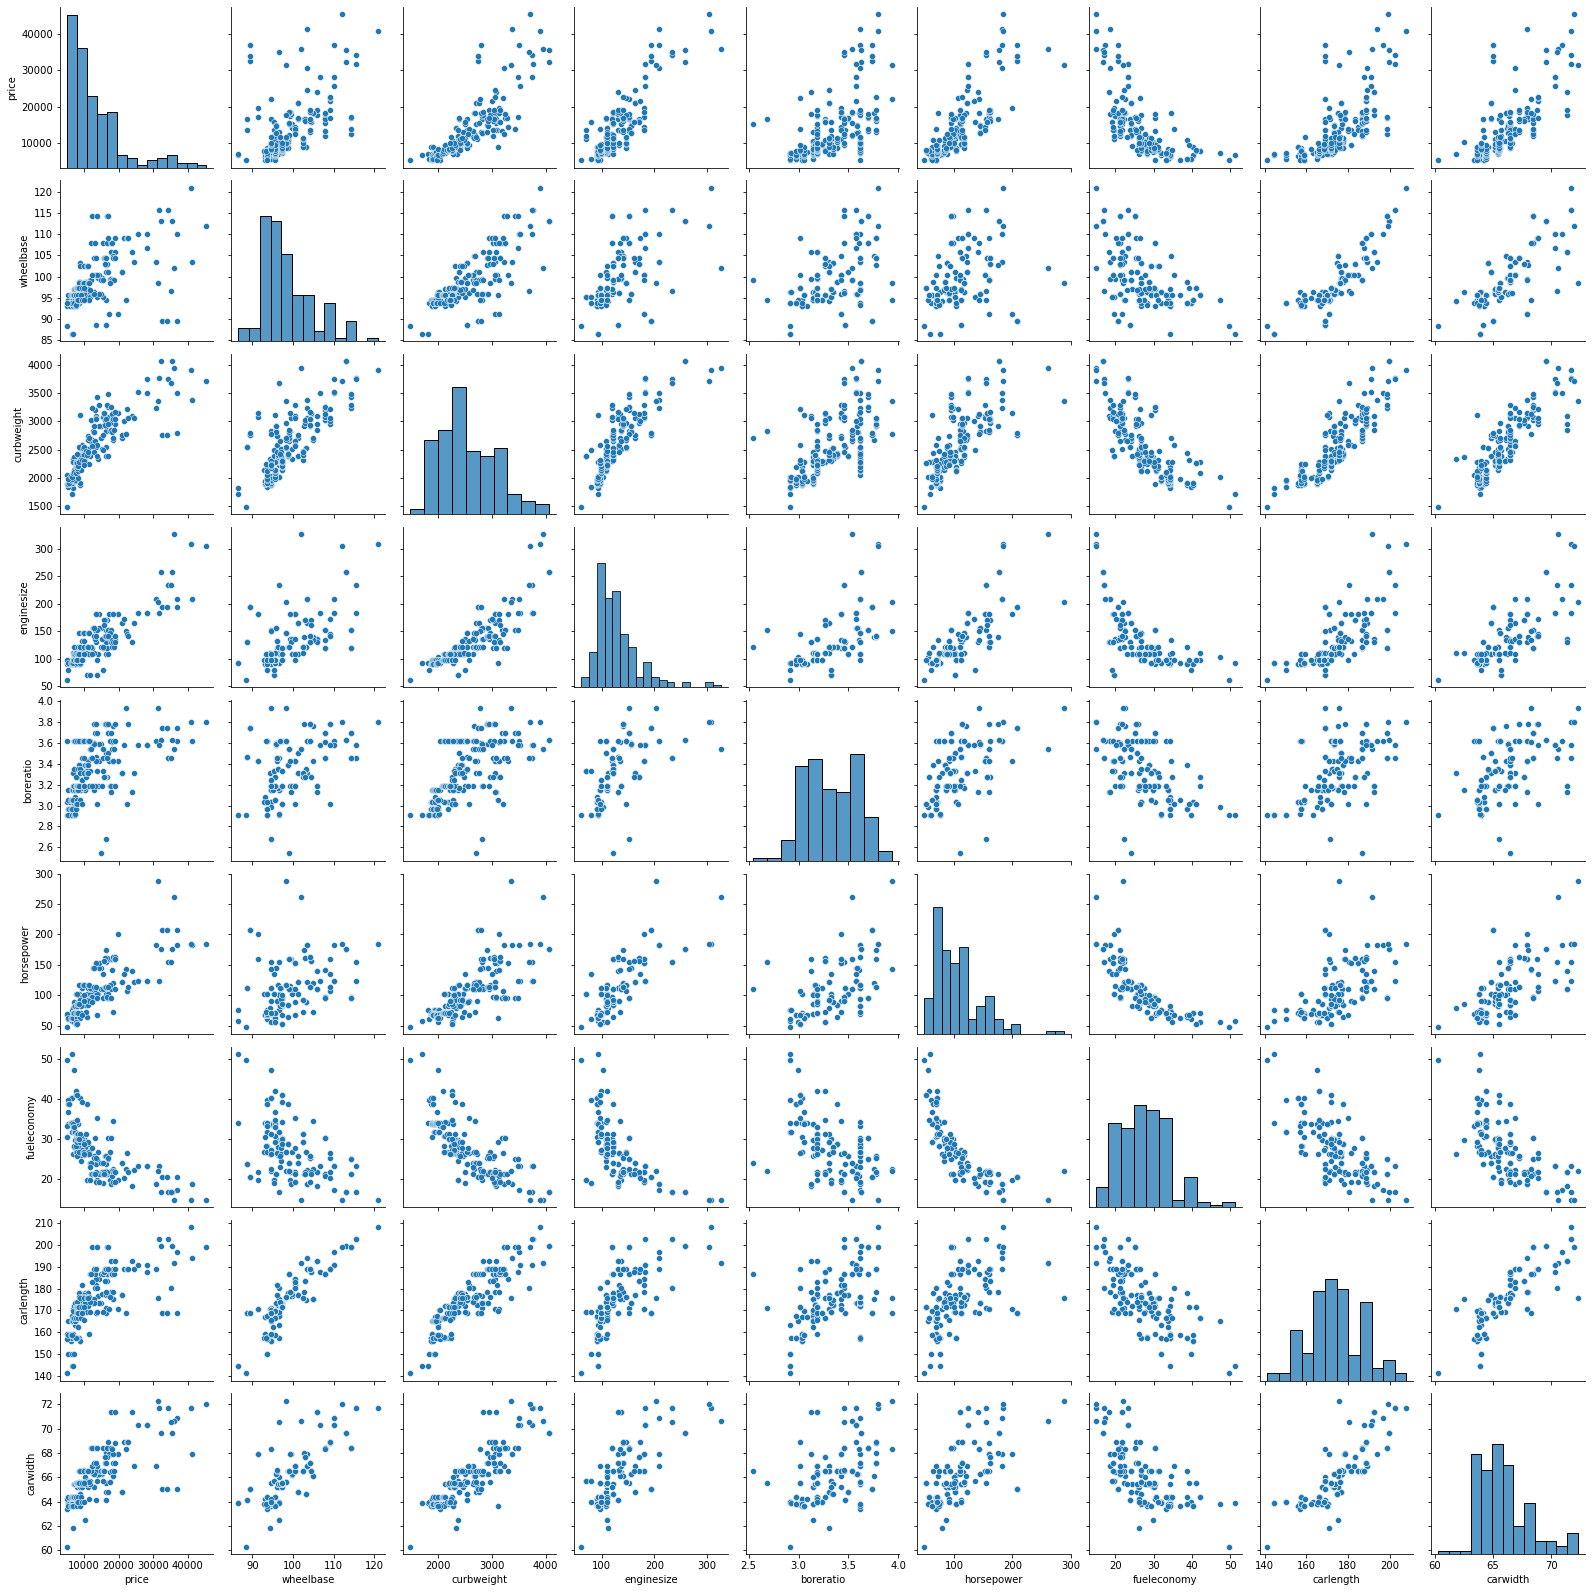

In [124]:
# Quan sát tổng quan dữ liệu và mối tương quan giữa các chiều dữ liệu theo từng cặp với nhau (các feature phải ở dạng numerical)
sns.pairplot(cars_lr)
plt.show()

### Bước 6 : Dummy Variables

In [189]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

Tạo một hàm dummies để biến các cột có kiểu dữ liệu phân loại **(categorical variable)** thành các biến giả nhận giá trị 1 hoặc 0 tương ứng với vị trí xuất hiện ban đầu của nó.
Ví dụ: carsrange có hai giá trị là *'Medium'* và *'Highend'*, ta biến hai giá trị đó thành hai cột mới với giá trị tương ứng từng cột là 0 hoặc 1 ứng với dòng nó xuất hiện ban đầu.

> Văn bản được thụt lề


Ví dụ: carsrange có hai giá trị là 'Medium' và 'Highend', ta biến hai giá trị đó thành hai cột mới với giá trị tương ứng từng cột là 0 hoặc 1 

In [190]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,
1,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
3,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
4,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
5,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [191]:
cars_lr.shape

(205, 31)

### Bước 7 : Chia dữ liệu thành Train và Test - Chuẩn hóa dữ liệu 

In [192]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
Trong các thuật toán machine learning nói chung, và trong deep learning nói riêng, các mô hình học cách dự đoán đầu ra từ đầu vào thông qua các ví dụ trong tập dữ liệu huấn luyện.

Các điểm dữ liệu đôi khi được đo đạc với những đơn vị khác nhau, m và feet chẳng hạn. Hoặc có hai thành phần (của vector dữ liệu) chênh lệch nhau quá lớn, một thành phần có khoảng giá trị từ 0 đến 1000, thành phần kia chỉ có khoảng giá trị từ 0 đến 1 chẳng hạn. Lúc này, chúng ta cần chuẩn hóa dữ liệu trước khi thực hiện các bước tiếp theo.
Có hai phương pháp scaling chính, đó là:

    1.Min-Max scaling
    2.Standardization (mean-0, sigma-1)

Ở đây, chúng ta sẽ sử dụng **Standard Scaling**.

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [194]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,
123,-0.700200,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,0.931319,-0.487238,-0.924500,1,...,0,0,0,1,0,0,0,0,0,0
126,1.151931,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.778472,-0.359789,1.114978,1,...,0,0,0,1,0,0,0,0,0,1
167,-0.452246,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,-0.075311,-0.375720,-0.833856,1,...,0,0,0,1,0,0,0,0,0,0
2,0.442648,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.615635,-0.367754,-0.788535,1,...,0,0,0,1,0,0,0,0,1,0
200,0.757571,0.972390,1.137720,0.123485,1.201877,1.501822,-1.274385,1.225364,0.616439,1,...,0,0,0,1,0,0,0,0,1,0


#### Sự tương quan giữa các biến với nhau qua heatmap

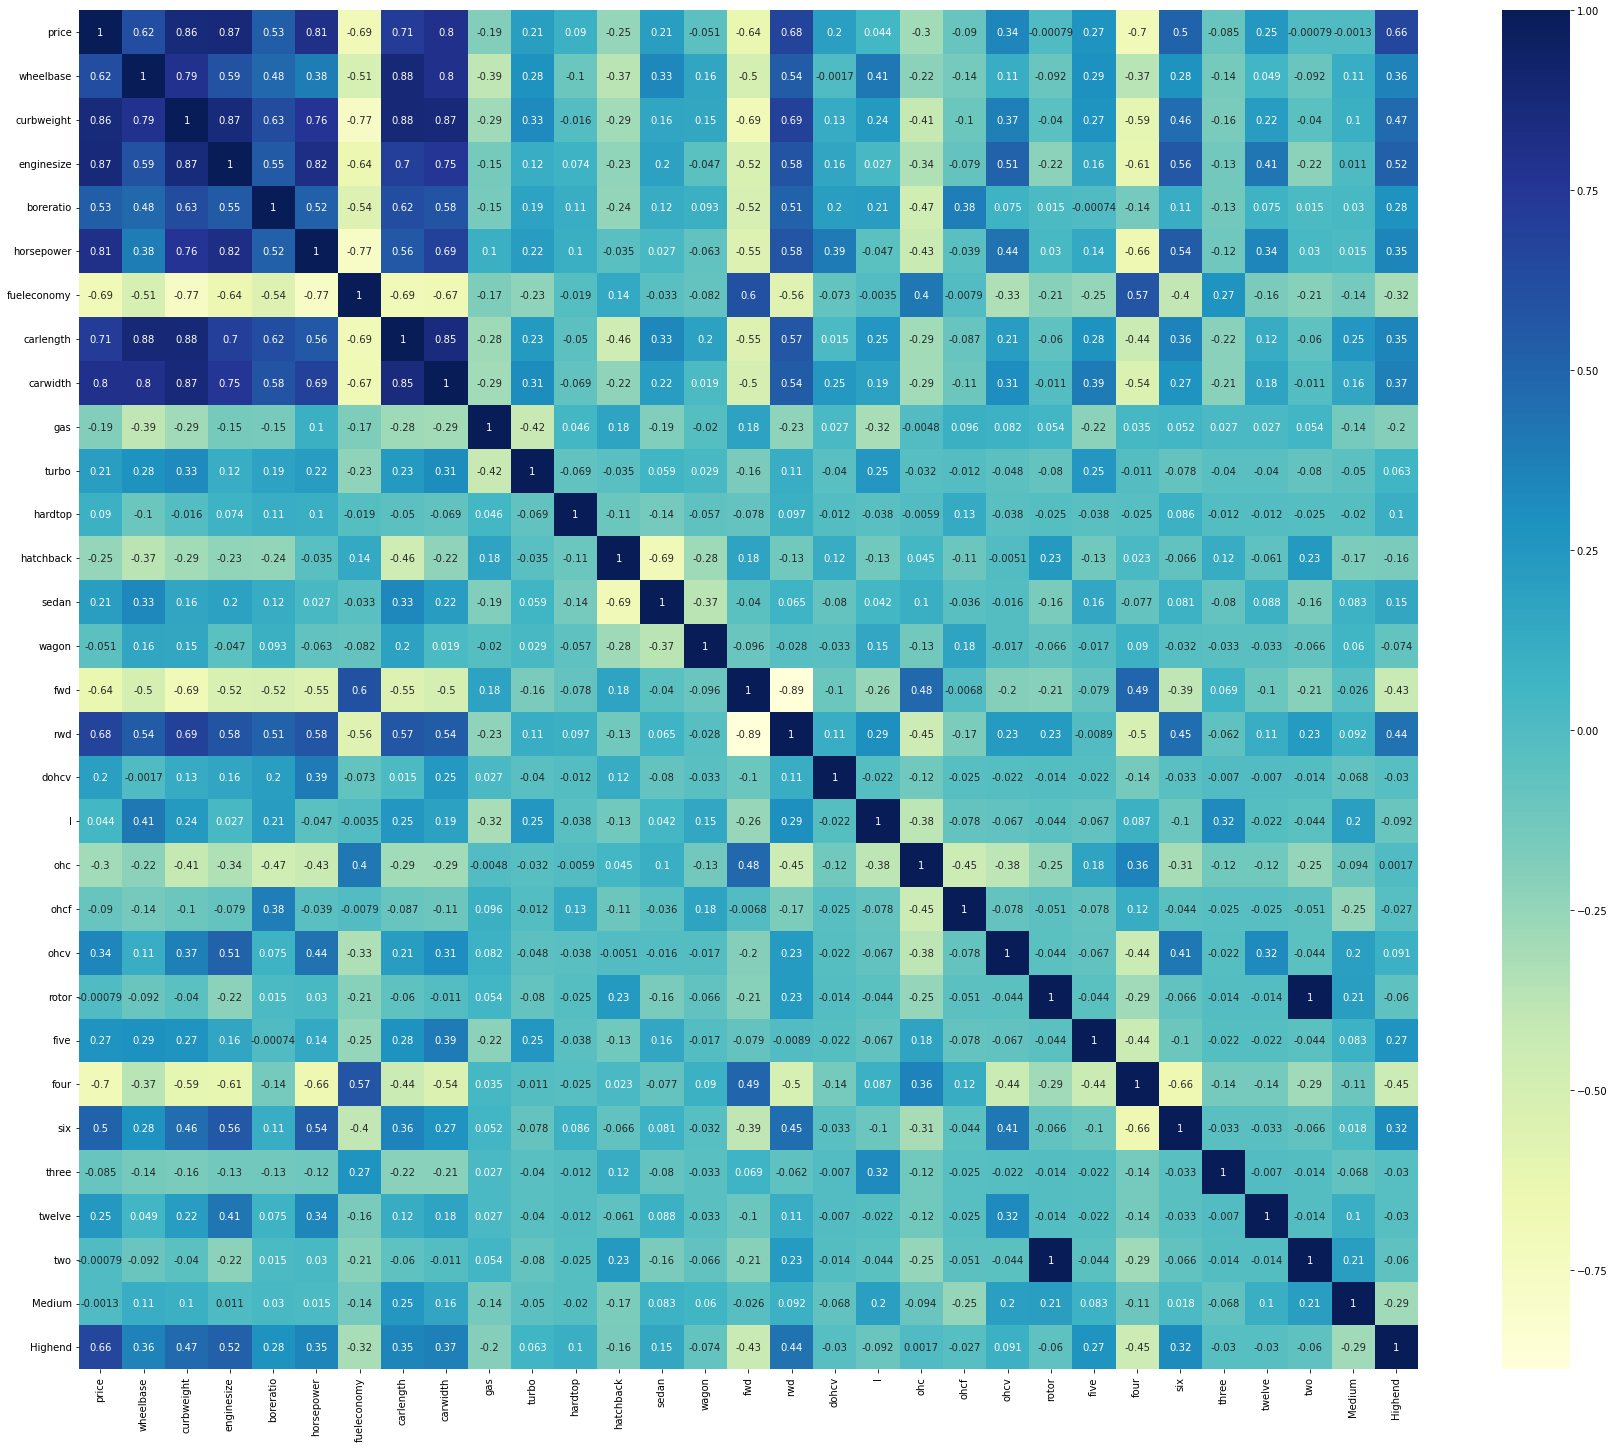

In [195]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Các biến có tương quan cao với `price` là - `curbweight`, `enginesize`, `horsepower`,`carwidth` và `Highend`.

In [196]:
import statsmodels.api as sm 
col = ['Highend','horsepower','enginesize','curbweight','carwidth']

Ta sẽ quan sát sự tương quan giữa `price` so với các biến trên qua Scatter PlotPlot

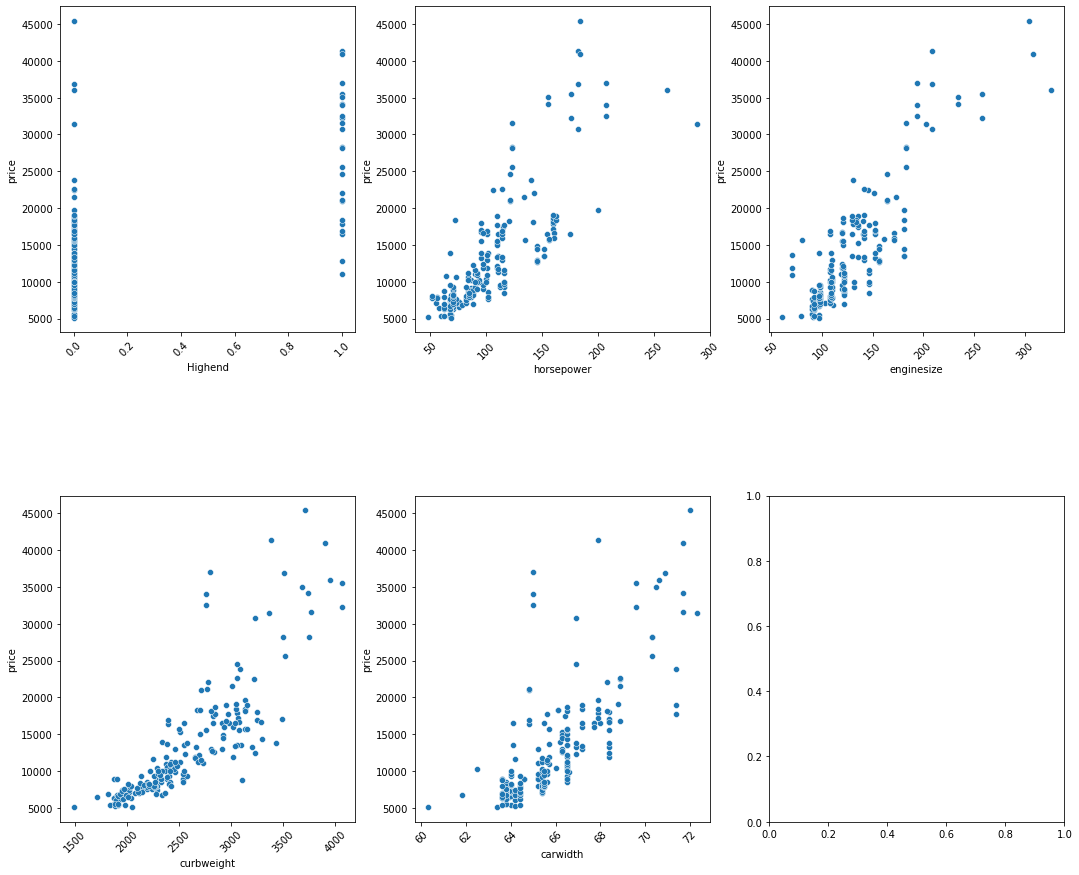

In [197]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=cars_lr, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [198]:
#Chia data thành hai biến x và y
y_train = df_train.pop('price')
X_train = df_train

Thử building model với các biến tương quan với `price` cao như trên.
Ta sẽ thử `horsepower` trước tiên.

In [199]:
X_train_1 = X_train['horsepower']

In [200]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [201]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           6.05e-34
Time:                        01:17:04   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.418e-17      0.050   1.29e-15      1.0

R-squared thu được là 0.65. 
Chúng ta còn khá nhiều biến nên sẽ tiếp tục add thêm. Tiếp tục, ta sẽ add thêm `curbweight`

In [202]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [203]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [204]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           3.34e-49
Time:                        01:17:05   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.418e-17      0.038   1.69e-15      1.0

R-squared tăng lên thành 0.797

In [205]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [206]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [207]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.16e-51
Time:                        01:17:06   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.204e-17      0.036   1.44e-15      1.0

Chúng ta đạt được R-squared = 0.819 bằng cách chọn thủ công các biến có tương quan cao. Bây giờ chúng ta sẽ thử dùng RFE lựa chọn các thuộc tính có liên quan

### Bước 8 : Model Building

In [164]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

Thuật toán được ta chọn ở đây là Linear Regression

### RFE 
RFE là một thuộc toán dùng để lựa chọn các thuộc tính liên quan.
RFE đề cập đến kỹ thuật chọn một tập hợp con của các cột có liên quan nhất cho một tập dữ liệu. Ít tính năng hơn có thể cho phép các thuật toán học máy chạy hiệu quả hơn (ít phức tạp hơn về không gian hoặc thời gian) và hiệu quả hơn. Một số thuật toán học máy có thể bị đánh lừa bởi các tính năng đầu vào không liên quan, dẫn đến hiệu suất dự đoán kém hơn.
Ở đây chúng ta sẽ dùng RFE vì có khá nhiều biến độc lập trên tập dữ liệu.

In [165]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', True, 1),
 ('enginesize', False, 10),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('fueleconomy', False, 6),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 14),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 4),
 ('dohcv', True, 1),
 ('l', False, 3),
 ('ohc', True, 1),
 ('ohcf', False, 2),
 ('ohcv', True, 1),
 ('rotor', False, 8),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 5),
 ('twelve', False, 7),
 ('two', True, 1),
 ('Medium', False, 12),
 ('Highend', True, 1)]

Xếp hạng các features có liên quan nhất. (1 là có mức độ liên quan cao nhất)

In [167]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carwidth', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'ohc', 'ohcv', 'five', 'four', 'six', 'two',
       'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

Sau khi chọn ra các cột bằng RFE thì ta sẽ bắt đầu tính toán và đánh giá các mô hình thông qua giá trị p-value và VIF với các tiêu chí như sau.

> Văn bản được thụt lề


    High p-value High VIF : Loại biến đó
    High p-value Low VIF or Low p-value High VIF : Loại biến có giá trị p-value cao đầu tiên
    Low p-value Low VIF : Chấp nhận biến 

### Checking VIF

Hệ số phóng đại phương sai hay còn gọi là VIF (Variance inflation factor) dùng để xác định mối tương quan giữa các biến độc lập còn gọi là hiện tượng đa cộng tuyến **(Multicollinearity)** và sức mạnh của mối tương quan đó. Nó là một tham số vô cùng quan trọng trong việc đánh giá mô hình tuyến tính.

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
   
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

p-value của `hardtop` lớn hơn mức ý nghĩa 0.05. Nên ta drop biến này

In [ ]:
X_train_new = X_train_rfe.drop(["hardtop"], axis = 1)

#### MODEL 2

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

#### MODEL 3


In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["two"], axis = 1)

#### MODEL 4

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["six"], axis = 1)

#### MODEL 5

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["ohcv"], axis = 1)

#### MODEL 6

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
checkVIF(X_train_new)

vì biến `curbweight` có giá trị VIF > 5 mà chúng ta cần giá trị VIF < 5 nên ta sẽ bỏ biến này

In [ ]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 7

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 8

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### MODEL 9

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
X_train_new = X_train_new.drop(["ohc"], axis = 1)

#### MODEL 10

In [ ]:
X_train_new = build_model(X_train_new,y_train)

In [ ]:
checkVIF(X_train_new)

### Bước 9 : Residual Analysis of Model

Kiểm tra sai số có tuân theo phân phối chuẩn không ?!

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Sai số gần như xấp xỉ phân phối chuẩn 

### Bước 10 : Prediction and Evaluation

In [ ]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [ ]:
df_test

In [ ]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_train_new.keys()

In [ ]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

**R2 score của Training là 0.904 và của Test là 0.843. Từ đây ta có thể nói rằng mô hình này đủ tốt để dự đoán giá xe với những thuộc tính dưới đây**
- horsepower
- carwidth	
- Highend
- hatchback
- five 
- four

In [ ]:
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [ ]:
pd.DataFrame({'y ':y_test, 'y_preds ':y_pred})

In [ ]:
print(lm.summary())

#### Inference :

1. *R bình phương và R bình phương hiệu chỉnh lần lượt là 0.904 và 0.899 (rất gần nhau).
2. *F-stats và Prob(F-stats) (overall model fit)* - 212.4 và 1.66e-66(gần như. 0.0) 
3. *p-values* - giá trị p-value cho từng biến đều nhỏ hơn mức ý nghĩa 0.05 - nghĩa là tất cả các biến trên đều có ý nghĩa thống kê

#### Phương trình để dự đoán giá xe

$ Carprice = 0.2497 +  0.3426  \times  horsepower  + 0.3670  \times  carwidth +  1.0778 \times Highend  - 0.2346 \times hatchback - 0.3942 \times five  - 0.3576 \times four$ 

## Xây dựng mô hình bằng Pycaret 

#### Ở phần trước chúng ta đã xây dựng mô hình dựa trên sự lựa chọn các tính năng một cách truyền thống dựa trên các thông số thống kê (Linear Regression)

### Ở trong phần này, chúng ta sẽ sử dụng thư viện Pycaret để xây dựng mô hình.

*PyCaret* là thư viện open-source machinelearning trong python, Thư viện tích hợp sẵn các mô hình cần thiết, giúp chúng ta train mô hình một lần trên nhiều thuật toán máy học khác nhau. Thư viện có hỗ trợ train trên GPU.

*PyCaret* là một thư viện mã thấp thay thế có thể thay thế hàng trăm dòng mã chỉ bằng vài dòng. Điều này làm cho chu kỳ thử nghiệm nhanh chóng và hiệu quả theo cấp số nhân.

*PyCaret* là đơn giản và dễ sử dụng. Tất cả các hoạt động được thực hiện trong PyCaret được lưu trữ tuần tự trong một Pipeline điều đó hoàn toàn tự động cho triển khai. Cho dù đó là nhập các giá trị bị thiếu, mã hóa một nóng, chuyển đổi dữ liệu phân loại, kỹ thuật tính năng hoặc thậm chí điều chỉnh siêu tham số, PyCaret đều tự động hóa tất cả. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
cars['model'] = [x.split()[0] for x in cars['CarName']]
cars['model'] = cars['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

In [4]:
categorical = cars.select_dtypes('object').columns

print(f'Categorical Columns: {cars[categorical].columns}')

Categorical Columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'model'],
      dtype='object')


##### Thư viện Pycaret vô cùng tiện dụng. Các hàm được tích hợp sẵn để có thể chỉ dùng một câu lệnh có thể sử dụng được nhanh chóng.

* Hàm setup được gọi với các tham số:
    - data: dữ liệu ban đầu.
    - targer: Biến cần dự đoán.
    - categorical_features: biến phân loại.
    - normalize: chuẩn hóa.
    - ignore_features: bỏ qua các tính năng trong quá trình train. 
    - silent: Kiểm soát đầu vào của các loại dữ liệu.
* Còn rất nhiều tham số khác, để biết thêm chi tiết, dùng hàm `??setup`

In [5]:
reg = setup(data = cars, 
             target = 'price',
             categorical_features = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'model']  , 
             ignore_features = ['car_ID'],
             normalize = True, 
             silent = True)

,Description,Value
0,session_id,4354
1,Target,price
2,Original Data,"(205, 27)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,12
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(143, 180)"


Mô hình thuộc dạng hồi quy nên chúng ta xem qua các thuật toán liên quan được hỗ trợ trong Pycaret
- True: Được hỗ trợ
- False: Không được hỗ trợ


In [66]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Việc train và lựa chọn model cũng vô cùng đơn giản. Chỉ với một dòng gọi hàm.

In [6]:
best_model = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1650.9323,5530733.2439,2292.0372,0.8794,0.1549,0.1207,0.1500
gbr,Gradient Boosting Regressor,1729.8073,6166184.9539,2410.1673,0.8757,0.1556,0.1230,0.0460
huber,Huber Regressor,1840.6269,6486819.3458,2476.7978,0.8673,0.1954,0.1501,0.0750
ridge,Ridge Regression,1898.1936,6869589.8250,2562.8909,0.8615,0.1972,0.1511,0.0200
ada,AdaBoost Regressor,1931.9984,6413464.5679,2487.3751,0.8577,0.1826,0.1574,0.0740
br,Bayesian Ridge,1917.0301,7114875.8773,2602.8129,0.8575,0.1997,0.1530,0.0460
llar,Lasso Least Angle Regression,1945.9403,8485006.7833,2738.2409,0.8573,0.1749,0.1361,1.7670
et,Extra Trees Regressor,1789.8086,6744137.3550,2516.6034,0.8376,0.1738,0.1381,0.1590
lightgbm,Light Gradient Boosting Machine,2217.9580,9559902.5574,3006.6610,0.8120,0.1904,0.1570,0.0260
lasso,Lasso Regression,2028.9469,9407078.6500,2959.1989,0.8054,0.1878,0.1616,0.0190


##### Thuật toán tốt nhất được chọn ra sau khi chạy. Ở đây là Random Forest

In [7]:
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4354, verbose=0, warm_start=False)

Hàm `create_model` tiến hành train và tính toán hiệu suất của mô hình bằng cách sử dụng xác thực chéo. Hàm này hiển thị các chỉ số hiệu suất theo nếp gấp (default fold = 10) và trả về mô hình đã đào tạo 

In [8]:
best_ = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1353.0177,4656591.1563,2157.9136,0.7260,0.1543,0.1130
1,1402.1833,3020566.1583,1737.9776,0.9457,0.1175,0.1030
2,1774.7410,5959237.6412,2441.1550,0.9149,0.1678,0.1454
3,2366.2921,10054484.1146,3170.8807,0.8040,0.2239,0.1496
4,1750.0007,4946590.4931,2224.0932,0.9450,0.1240,0.1068
5,1541.6282,3734092.1210,1932.3799,0.8194,0.1592,0.1280
6,1074.5232,2409556.2238,1552.2745,0.9744,0.1084,0.0758
7,1935.8914,10359579.7046,3218.6301,0.8665,0.1703,0.1167
8,1979.8043,6129016.1277,2475.6850,0.8535,0.2005,0.1761


Hàm `tune_model` điều chỉnh các siêu tham số của mô hình.

In [9]:
tuned_model = tune_model(best_, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1347.3746,4891773.6650,2211.7354,0.7121,0.1618,0.1150
1,1388.2163,3146968.7377,1773.9698,0.9434,0.1256,0.1067
2,1773.8484,6031617.0071,2455.9351,0.9139,0.1773,0.1496
3,2197.0332,9067837.6381,3011.2850,0.8232,0.2229,0.1444
4,1632.1819,4213422.0043,2052.6622,0.9531,0.1186,0.1024
5,1596.9389,3697307.5404,1922.8384,0.8212,0.1562,0.1338
6,1168.9597,2971647.9160,1723.8468,0.9685,0.1094,0.0787
7,1993.0904,10201086.5877,3193.9140,0.8685,0.1778,0.1225
8,2073.6844,6853735.7315,2617.9640,0.8361,0.2031,0.1785


Mô hình đạt hiệu suất 87.84% sau khi tune model

##### Các tính năng quan trọng trong mô hình

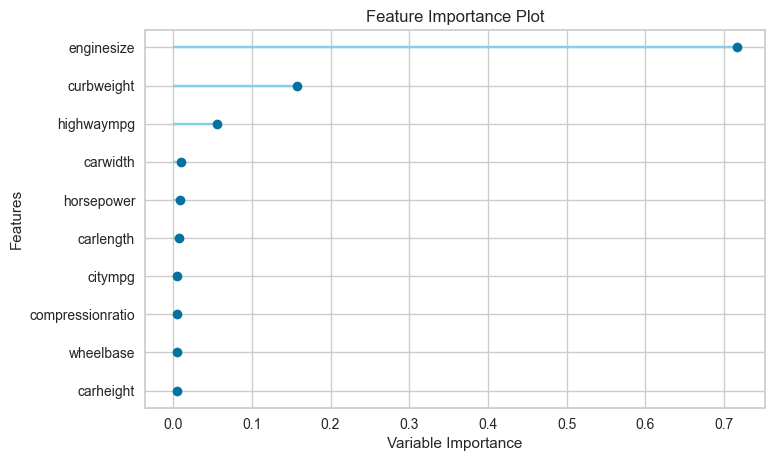

In [10]:
plot_model(estimator = tuned_model, plot = 'feature')

In [11]:
model = finalize_model(tuned_model)

In [14]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.02,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=4354, verbose=0, warm_start=False)

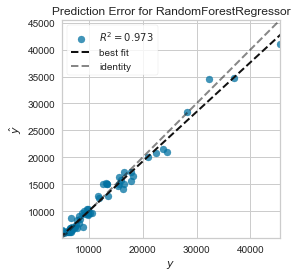

In [12]:
plot_model(model, plot = 'error')

#### Tiến hành dự đoán dựa trên mô hình vừa chọn được

In [13]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,946.4116,1689360.9014,1299.7542,0.9732,0.0938,0.0756


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo,price,Label
0,-0.054277,0.239581,0.219861,-0.067607,-0.404942,-0.168834,0.153855,0.410513,-0.402991,-0.546165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10595.0,9696.519754
1,-0.054277,0.239581,0.219861,0.631276,-0.355970,-0.168834,0.153855,0.410513,-0.402991,-0.546165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10245.0,9701.664869
2,-0.365400,-0.111975,-0.289478,0.398315,0.114163,-0.508198,0.994434,-1.999310,-0.614927,0.112817,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11694.0,12906.314799
3,-0.758398,-0.522125,-0.937729,-0.494704,-0.640009,-0.750601,-0.394349,-0.585548,-0.214604,0.137224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9298.0,9475.255720
4,0.207721,0.808767,0.219861,0.475968,0.917308,1.261341,0.300043,0.024941,-0.308798,1.113495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13499.0,15007.423669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-1.577143,-0.505385,-0.474693,-0.882972,0.407997,1.576465,1.432998,-1.163905,-0.191055,2.455867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37028.0,34644.519960
58,-0.627399,-0.497014,-0.150569,-1.659510,-0.414736,-1.429328,-0.065427,-0.023255,-0.214604,-0.131250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11845.0,12468.223363
59,0.617093,0.716692,0.775503,-0.727664,0.752761,1.018939,-0.284708,0.281988,-0.238152,1.333156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16558.0,17216.465236
60,2.270958,2.064325,1.655273,-0.417050,2.887950,3.127841,1.030982,2.916728,-0.520733,1.699257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32250.0,34527.628254


In [15]:
data_unseen = cars.copy()
data_unseen.drop('price',axis=1)
predict_model(model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1021.0500,1861356.7429,1364.3155,0.9707,0.1016,0.0814


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model,Label
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,13806.646731
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,13806.646731
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15930.105257
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,11893.807435
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,16400.272609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,19008.654667
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,19356.453065
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,20121.418233
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,20898.583090


#### Thông qua việc sử dụng Pycaret ta chọn được mô hình với thuật toán Random Forest để dự đoán giá nhà với R2 sau khi hoàn thiện là 97%, một hiệu suất tốt cho mô hình dự đoán